# Super Bowl Television Ratings EDA

Link to Super Bowl Ratings Data: https://www.kaggle.com/datasets/mattop/super-bowl-television-ratings

Link to Inflation Data: https://www.officialdata.org/us/inflation/1800?amount=1/

### Necessary Imports

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Define Matplotlib Colors Class

In [337]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

### Read in, Prepare Data + Calculate New Data

In [338]:
df = pd.read_csv('super-bowl-ratings.csv')

df.insert(loc=3, column='year', value = pd.DatetimeIndex(df['date']).year)
df.insert(loc=6, column='average_viewers_mil', value = df.average_viewers/1000000)
df['cost_30_sec_100k'] = df.cost_of_30_second_ad_usd/100000
df['ad30sec_cost_view'] = df.cost_of_30_second_ad_usd / df.average_viewers

### Read in Inflation Data

In [339]:
inf_df = pd.read_csv('inflation_data.csv')
inf_df = inf_df[inf_df.year >= 1967].reset_index(drop=True)
inf_df = inf_df[inf_df.year <= 2021].reset_index(drop=True)
inf_df.amount = inf_df.amount/2.65
inf_df = inf_df.rename(columns={'amount':'dollar_amount_in_1967'})
inf_df.insert(loc=2, column='dollar_amount_in_2021', value = inf_df.dollar_amount_in_1967/8.116981)
inf_df.dollar_amount_in_1967 = inf_df.dollar_amount_in_1967.round(2)
inf_df.dollar_amount_in_2021 = inf_df.dollar_amount_in_2021.round(2)
inf_df

,year,dollar_amount_in_1967,dollar_amount_in_2021,inflation rate
0,1967,1.00,0.12,0.03
1,1968,1.04,0.13,0.04
2,1969,1.10,0.14,0.05
3,1970,1.16,0.14,0.06
4,1971,1.21,0.15,0.04
5,1972,1.25,0.15,0.03
6,1973,1.33,0.16,0.06
7,1974,1.48,0.18,0.11
8,1975,1.61,0.20,0.09
9,1976,1.71,0.21,0.06


### Merge Inflation DF and Super Bowl DF

In [340]:
df = df.merge(inf_df, left_on='year',right_on='year')

###  Determine Ad Cost in 2021 Dollars

In [341]:
df['ad_inflation'] =  (df['cost_of_30_second_ad_usd'] / df.shift()['cost_of_30_second_ad_usd'])-1

df['ad_cost_1967_dollars'] = (df.cost_of_30_second_ad_usd / df.dollar_amount_in_1967).round(2)
df['ad_cost_1967_dollars_100k'] = df['ad_cost_1967_dollars']/100000

df['ad_cost_2021_dollars'] = (df.cost_of_30_second_ad_usd / df.dollar_amount_in_2021).round(2)
df['ad_cost_2021_dollars_100k'] = df['ad_cost_2021_dollars']/100000

### Display Super Bowl DataFrame

In [342]:
df

,super_bowl,super_bowl_number,date,year,network,average_viewers,average_viewers_mil,total_viewers,household_rating,household_share,...,cost_30_sec_100k,ad30sec_cost_view,dollar_amount_in_1967,dollar_amount_in_2021,inflation rate,ad_inflation,ad_cost_1967_dollars,ad_cost_1967_dollars_100k,ad_cost_2021_dollars,ad_cost_2021_dollars_100k
0,I,1,1967-01-15,1967,NBC,24430000,24.43,35600000.0,18.5,36,...,0.37500,0.001535,1.00,0.12,0.03,NaN,37500.00,0.375000,312500.00,3.125000
1,II,2,1968-01-14,1968,CBS,39120000,39.12,51300000.0,36.8,68,...,0.54500,0.001393,1.04,0.13,0.04,0.453333,52403.85,0.524038,419230.77,4.192308
2,III,3,1969-01-12,1969,NBC,41660000,41.66,54500000.0,36.0,70,...,0.55000,0.001320,1.10,0.14,0.05,0.009174,50000.00,0.500000,392857.14,3.928571
3,IV,4,1970-01-11,1970,CBS,44270000,44.27,59200000.0,39.4,69,...,0.78200,0.001766,1.16,0.14,0.06,0.421818,67413.79,0.674138,558571.43,5.585714
4,V,5,1971-01-17,1971,NBC,46040000,46.04,58500000.0,39.9,75,...,0.72500,0.001575,1.21,0.15,0.04,-0.072890,59917.36,0.599174,483333.33,4.833333
5,VI,6,1972-01-16,1972,CBS,56640000,56.64,67300000.0,44.2,74,...,0.86100,0.001520,1.25,0.15,0.03,0.187586,68880.00,0.688800,574000.00,5.740000
6,VII,7,1973-01-14,1973,NBC,53320000,53.32,67700000.0,42.7,72,...,0.88100,0.001652,1.33,0.16,0.06,0.023229,66240.60,0.662406,550625.00,5.506250
7,VIII,8,1974-01-13,1974,CBS,51700000,51.70,63200000.0,41.6,73,...,1.03500,0.002002,1.48,0.18,0.11,0.174801,69932.43,0.699324,575000.00,5.750000
8,IX,9,1975-01-12,1975,NBC,56050000,56.05,71300000.0,42.4,72,...,1.07000,0.001909,1.61,0.20,0.09,0.033816,66459.63,0.664596,535000.00,5.350000
9,X,10,1976-01-18,1976,CBS,57710000,57.71,73300000.0,42.3,78,...,1.10000,0.001906,1.71,0.21,0.06,0.028037,64327.49,0.643275,523809.52,5.238095


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   super_bowl                 55 non-null     object 
 1   super_bowl_number          55 non-null     int64  
 2   date                       55 non-null     object 
 3   year                       55 non-null     int64  
 4   network                    55 non-null     object 
 5   average_viewers            55 non-null     int64  
 6   average_viewers_mil        55 non-null     float64
 7   total_viewers              52 non-null     float64
 8   household_rating           55 non-null     float64
 9   household_share            55 non-null     int64  
 10  cost_of_30_second_ad_usd   55 non-null     int64  
 11  cost_30_sec_100k           55 non-null     float64
 12  ad30sec_cost_view          55 non-null     float64
 13  dollar_amount_in_1967      55 non-null     float64
 

### DataFrame Correlation Matrix

In [344]:
df.corr()

,super_bowl_number,year,average_viewers,average_viewers_mil,total_viewers,household_rating,household_share,cost_of_30_second_ad_usd,cost_30_sec_100k,ad30sec_cost_view,dollar_amount_in_1967,dollar_amount_in_2021,inflation rate,ad_inflation,ad_cost_1967_dollars,ad_cost_1967_dollars_100k,ad_cost_2021_dollars,ad_cost_2021_dollars_100k
super_bowl_number,1.000000,1.000000,0.900947,0.900947,0.949139,0.233520,-0.054082,0.932860,0.932860,0.940861,0.998516,0.998332,-0.619471,-0.347331,0.962396,0.962396,0.962250,0.962250
year,1.000000,1.000000,0.900947,0.900947,0.949139,0.233520,-0.054082,0.932860,0.932860,0.940861,0.998516,0.998332,-0.619471,-0.347331,0.962396,0.962396,0.962250,0.962250
average_viewers,0.900947,0.900947,1.000000,1.000000,0.981661,0.575506,0.109217,0.763346,0.763346,0.749155,0.897963,0.898574,-0.524622,-0.273643,0.808550,0.808550,0.808028,0.808028
average_viewers_mil,0.900947,0.900947,1.000000,1.000000,0.981661,0.575506,0.109217,0.763346,0.763346,0.749155,0.897963,0.898574,-0.524622,-0.273643,0.808550,0.808550,0.808028,0.808028
total_viewers,0.949139,0.949139,0.981661,0.981661,1.000000,0.470891,-0.022327,0.808245,0.808245,0.811244,0.949234,0.950013,-0.592424,-0.274755,0.858145,0.858145,0.857238,0.857238
household_rating,0.233520,0.233520,0.575506,0.575506,0.470891,1.000000,0.678676,0.109364,0.109364,0.067070,0.215893,0.217521,0.047253,0.048546,0.137397,0.137397,0.136559,0.136559
household_share,-0.054082,-0.054082,0.109217,0.109217,-0.022327,0.678676,1.000000,0.019942,0.019942,-0.032000,-0.082038,-0.081366,0.223549,-0.093499,-0.025563,-0.025563,-0.025838,-0.025838
cost_of_30_second_ad_usd,0.932860,0.932860,0.763346,0.763346,0.808245,0.109364,0.019942,1.000000,1.000000,0.993250,0.926313,0.925783,-0.564368,-0.286319,0.989896,0.989896,0.989942,0.989942
cost_30_sec_100k,0.932860,0.932860,0.763346,0.763346,0.808245,0.109364,0.019942,1.000000,1.000000,0.993250,0.926313,0.925783,-0.564368,-0.286319,0.989896,0.989896,0.989942,0.989942
ad30sec_cost_view,0.940861,0.940861,0.749155,0.749155,0.811244,0.067070,-0.032000,0.993250,0.993250,1.000000,0.935223,0.934659,-0.568854,-0.298988,0.990161,0.990161,0.990231,0.990231


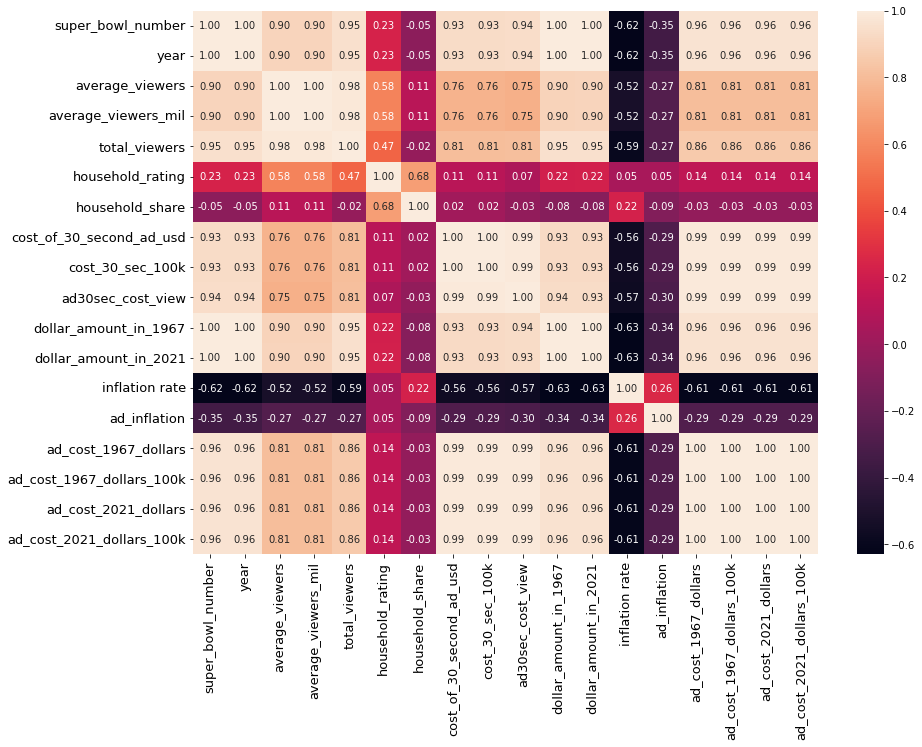

In [345]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

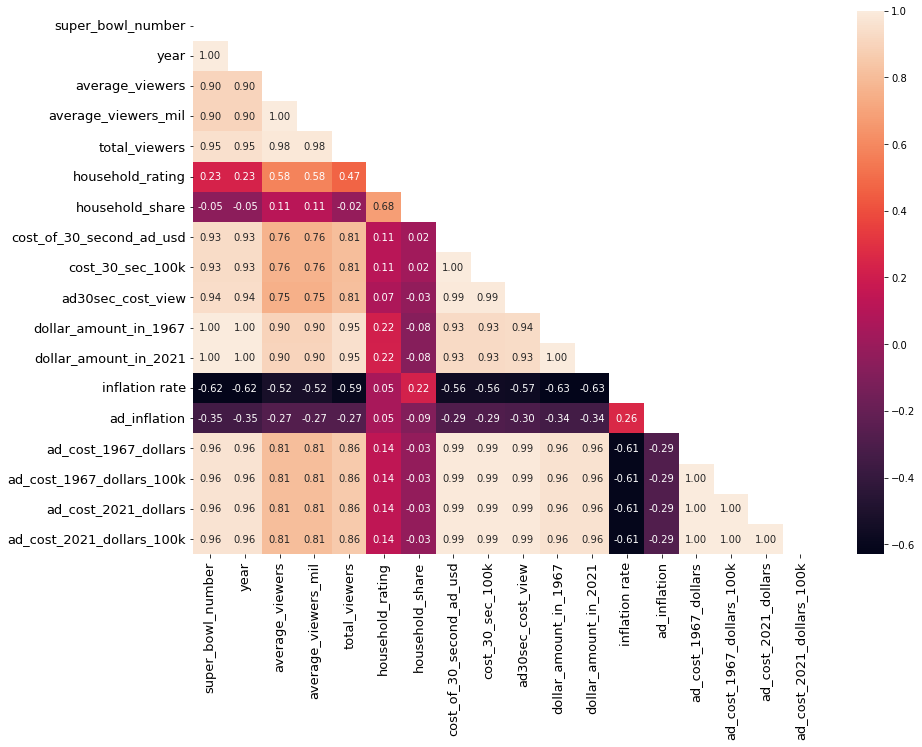

In [346]:
corr = df.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, fmt=".2f", mask=matrix)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

### Analyzing Based on Network

In [347]:
df.network.unique()

array(['NBC', 'CBS', 'ABC', 'Fox'], dtype=object)

In [348]:
network_pivot = df.groupby(['network', 'year']).first()
display(network_pivot)

super_bowl  super_bowl_number        date  average_viewers  \
network year                                                              
ABC     1985        XIX                 19  1985-01-20         85530000   
        1988       XXII                 22  1988-01-31         80140000   
        1991        XXV                 25  1991-01-27         79510000   
        1995       XXIX                 29  1995-01-29         83420000   
        2000      XXXIV                 34  2000-01-30         88470000   
        2003     XXXVII                 37  2003-01-26         88640000   
        2006         XL                 40  2006-02-05         90750000   
CBS     1968         II                  2  1968-01-14         39120000   
        1970         IV                  4  1970-01-11         44270000   
        1972         VI                  6  1972-01-16         56640000   
        1974       VIII                  8  1974-01-13         51700000   
        1976          X                 10  1976-01-18         57710000   
        1978        XII                 12  1978-01-15         78940000   
        1980        XIV                 14  1980-01-20         76240000   
        1982        XVI                 16  1982-01-24         85240000   
        1984      XVIII                 18  1984-01-22         77620000   
        1987        XXI                 21  1987-01-25         87190000   
        1990       XXIV                 24  1990-01-28         73850000   
        1992       XXVI                 26  1992-01-26         79590000   
        2001       XXXV                 35  2001-01-28         84340000   
        2004    XXXVIII                 38  2004-02-01         89800000   
        2007        XLI                 41  2007-02-04         93180000   
        2010       XLIV                 44  2010-02-07        106480000   
        2013      XLVII                 47  2013-02-03        108690000   
        2016          L                 50  2016-02-07        111860000   
        2019       LIII                 53  2019-02-03         98480000   
        2021         LV                 55  2021-02-07         98200000   
Fox     1997       XXXI                 31  1997-01-26         87870000   
        1999     XXXIII                 33  1999-01-31         83720000   
        2002      XXXVI                 36  2002-02-03         86800000   
        2005      XXXIX                 39  2005-02-06         86070000   
        2008       XLII                 42  2008-02-03         97450000   
        2011        XLV                 45  2011-02-06        111040000   
        2014     XLVIII                 48  2014-02-02        112190000   
        2017         LI                 51  2017-02-05        111320000   
        2020        LIV                 54  2020-02-02        101320000   
NBC     1967          I                  1  1967-01-15         24430000   
        1969        III                  3  1969-01-12         41660000   
        1971          V                  5  1971-01-17         46040000   
        1973        VII                  7  1973-01-14         53320000   
        1975         IX                  9  1975-01-12         56050000   
        1977         XI                 11  1977-01-09         62050000   
        1979       XIII                 13  1979-01-21         74740000   
        1981         XV                 15  1981-01-25         68290000   
        1983       XVII                 17  1983-01-30         81770000   
        1986         XX                 20  1986-01-26         92570000   
        1989      XXIII                 23  1989-01-22         81590000   
        1993      XXVII                 27  1993-01-31         90990000   
        1994     XXVIII                 28  1994-01-30         90000000   
        1996        XXX                 30  1996-01-28         94080000   
        1998      XXXII                 32  1998-01-25         90000000   
        2009      XLIII               

In [349]:
df_abc = df[df.network=='ABC']
df_cbs = df[df.network=='CBS'] 
df_nbc = df[df.network=='NBC']
df_fox = df[df.network=='Fox']

In [350]:
labels=[]
data = []
for i in df.network.unique():
    labels.append(i)
    data.append(df[df.network==i].super_bowl.count())

network_counts = pd.DataFrame()
network_counts['network']=labels
network_counts['count']=data
network_counts = network_counts.sort_values('count', ascending=False).reset_index(drop=True)
display(network_counts)

,network,count
0,CBS,20
1,NBC,19
2,Fox,9
3,ABC,7


### Data Visualizations

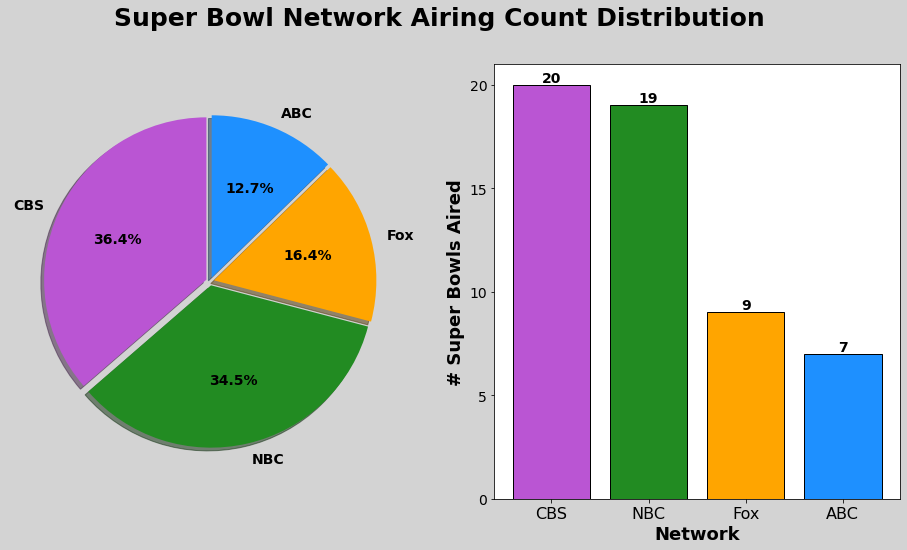

In [351]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
fig.set_facecolor('lightgrey')
plt.suptitle('Super Bowl Network Airing Count Distribution', fontsize=25, fontweight='bold')

explode=[.025,.025,.025,.025]

colors = ['mediumorchid', 'forestgreen', 'orange', 'dodgerblue']

ax[0].pie(network_counts['count'], 
          labels=network_counts['network'], 
          startangle=90, 
          autopct='%1.1f%%',
          explode=explode,
          shadow=True,
          colors=colors,
         textprops={'fontsize': 14, 'fontweight':'bold'})

ax[1].bar(network_counts['network'],
          network_counts['count'],
          color=colors,
         edgecolor='black')
ax[1].bar_label(ax[1].containers[0], fontsize=14, fontweight='bold')
ax[1].set_xlabel('Network', fontsize=18, fontweight='bold')
ax[1].set_ylabel('# Super Bowls Aired', fontsize=18, fontweight='bold')
ax[1].set_xticks([r for r in range(len(network_counts.network))], network_counts.network, size=16)
plt.yticks([i for i in range(0,25,5)],size=14)

plt.show()

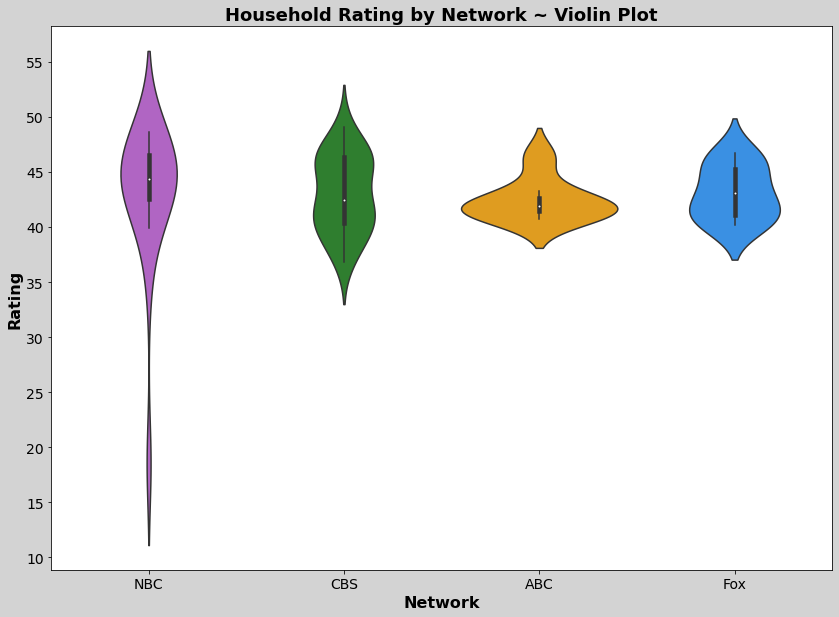

In [352]:
colors = ['mediumorchid', 'forestgreen', 'orange', 'dodgerblue']

plt.rcParams["figure.figsize"] = (14,10)
fig, axs = plt.subplots(nrows=1, ncols=1)
fig.set_facecolor('lightgrey')

sns.violinplot(data=df, x=df.network, y='household_rating', palette=colors)

plt.xticks([r for r in range(len(df.network.unique()))], fontsize=14)
plt.xlabel('Network', fontsize=16, fontweight='bold')

plt.yticks([i for i in range(10, 60, 5)], fontsize=14)
plt.ylabel('Rating', fontsize=16, fontweight='bold')

plt.title('Household Rating by Network ~ Violin Plot', fontsize=18, fontweight='bold')

plt.show()

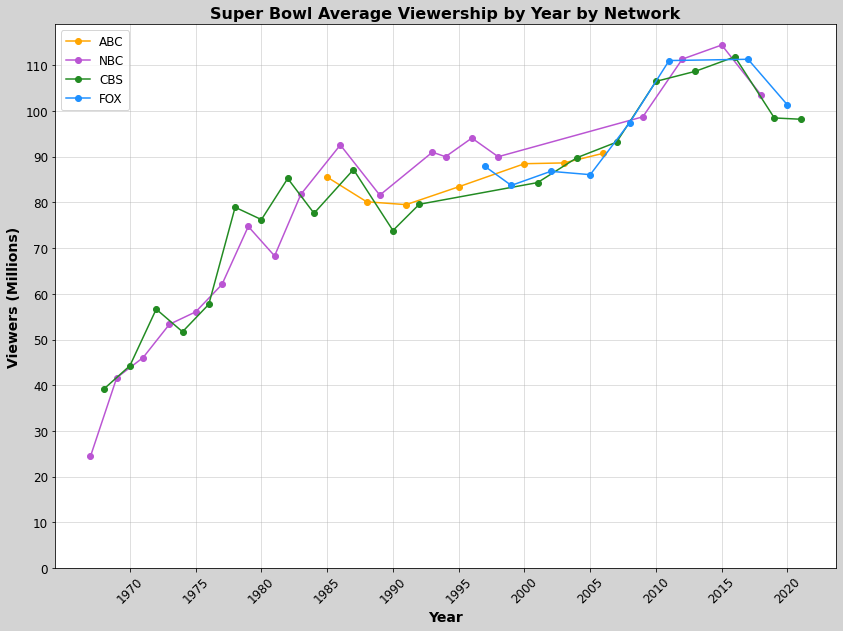

In [353]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_facecolor('lightgrey')
plt.rcParams["figure.figsize"] = (14,10)

plt.plot(df_abc.index, df_abc.average_viewers_mil, color='orange', marker='o', label='ABC')
plt.plot(df_nbc.index, df_nbc.average_viewers_mil, color='mediumorchid', marker='o', label='NBC')
plt.plot(df_cbs.index, df_cbs.average_viewers_mil, color='forestgreen', marker='o', label='CBS')
plt.plot(df_fox.dropna().index, df_fox.dropna().average_viewers_mil, color='dodgerblue', marker='o', label='FOX')

plt.title('Super Bowl Average Viewership by Year by Network', fontweight='bold', fontsize=16)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Viewers (Millions)', fontweight='bold', fontsize=14)

plt.xticks(df.index[(df["year"]==1965) | (df["year"] % 5 == 0)], df["year"][(df["year"]==1965) | (df["year"] % 5 == 0)], rotation=45, fontsize=12)
plt.yticks([i for i in range(0,120,10)], fontsize=12)

plt.legend(loc='best', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

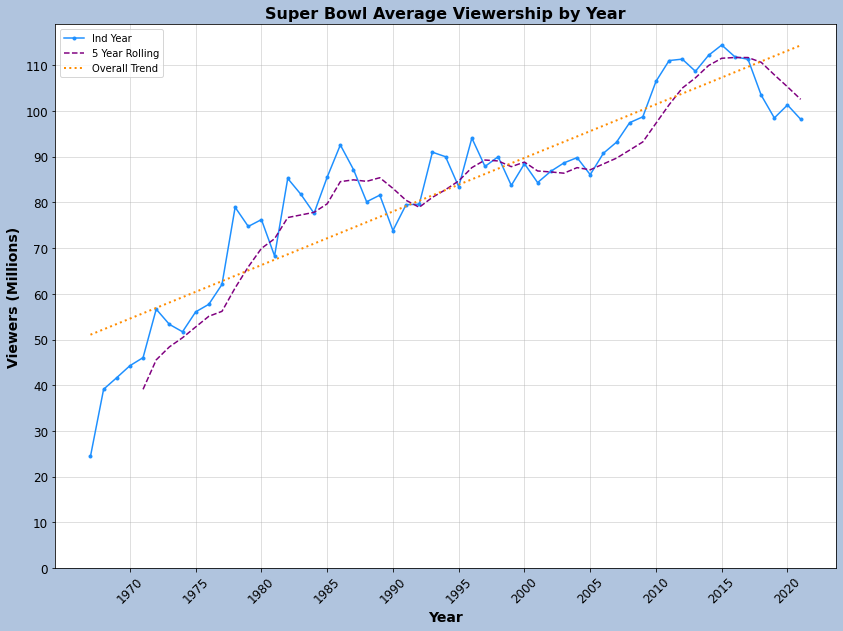


Overall Trend Line Equation: y = 1.172310x + (51.055805)


In [354]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_facecolor('lightsteelblue')

plt.rcParams["figure.figsize"] = (14,10)
plt.plot(df.index, df.average_viewers_mil, color='dodgerblue', linewidth=1.5, marker='.', label='Ind Year')

rolling_mean_5 = df.average_viewers_mil.rolling(5).mean()
plt.plot(df.index, rolling_mean_5, color="Purple", linestyle='dashed', alpha=1, label="5 Year Rolling")

z = np.polyfit(df.index, df.average_viewers_mil, 1)
p = np.poly1d(z)
plt.plot(df.index,p(df.index), linestyle='dotted',linewidth=2, color='darkorange', label='Overall Trend')

plt.title('Super Bowl Average Viewership by Year', fontweight='bold', fontsize=16)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Viewers (Millions)', fontweight='bold', fontsize=14)

plt.xticks(df.index[(df["year"]==1965) | (df["year"] % 5 == 0)], df["year"][(df["year"]==1965) | (df["year"] % 5 == 0)], rotation=45, fontsize=12)
plt.yticks([i for i in range(0,120,10)], fontsize=12)

plt.legend(loc='best')
plt.grid(alpha=0.5)
plt.show()
print()
print(color.BOLD +'Overall Trend Line Equation: ' + color.END + "y = %.6fx + (%.6f)"%(z[0],z[1]))

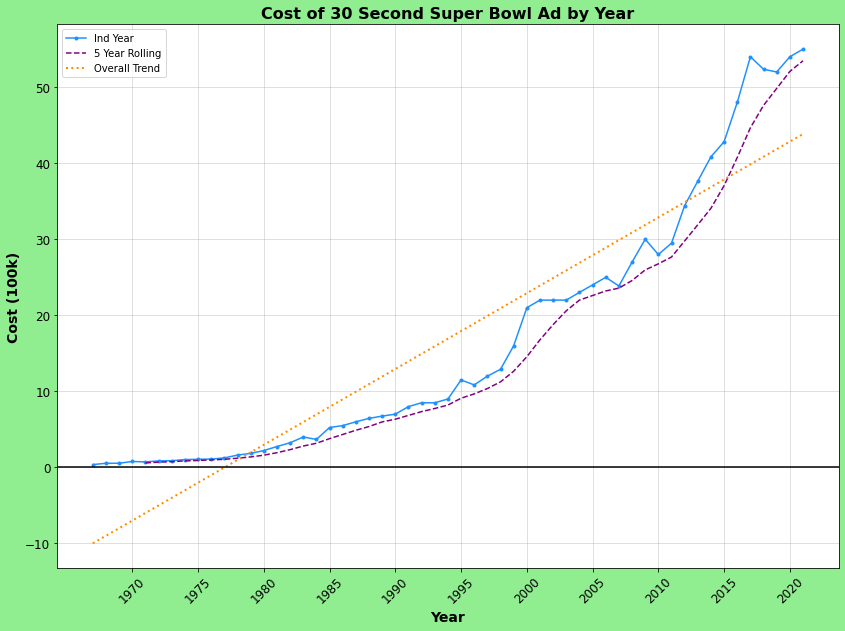


Overall Trend Line Equation: y = 0.996743x + (-9.980618)


In [355]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_facecolor('lightgreen')

plt.rcParams["figure.figsize"] = (14,10)
plt.plot(df.index, df.cost_30_sec_100k, color='dodgerblue', linewidth=1.5, marker='.', label='Ind Year')

rolling_mean_5 = df.cost_30_sec_100k.rolling(5).mean()
plt.plot(df.index, rolling_mean_5, color="Purple", linestyle='dashed', alpha=1, label="5 Year Rolling")

z = np.polyfit(df.index, df.cost_30_sec_100k, 1)
p = np.poly1d(z)
plt.plot(df.index,p(df.index), linestyle='dotted',linewidth=2, color='darkorange', label='Overall Trend')

plt.axhline(0, color='black')

plt.title('Cost of 30 Second Super Bowl Ad by Year', fontweight='bold', fontsize=16)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Cost (100k)', fontweight='bold', fontsize=14)

plt.xticks(df.index[(df["year"]==1970) | (df["year"] % 5 == 0)], df["year"][(df["year"]==1970) | (df["year"] % 5 == 0)], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='best')
plt.grid(alpha=0.5)
plt.show()
print()
print(color.BOLD +'Overall Trend Line Equation: ' + color.END + "y = %.6fx + (%.6f)"%(z[0],z[1]))

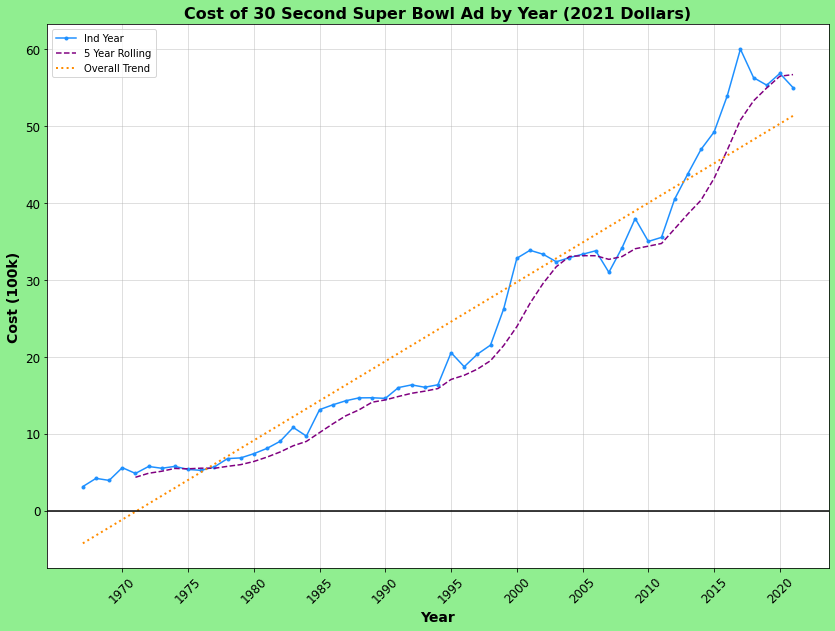


Overall Trend Line Equation: y = 1.029315x + (-4.253961)


In [356]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_facecolor('lightgreen')

plt.rcParams["figure.figsize"] = (14,10)
plt.plot(df.index, df.ad_cost_2021_dollars_100k, color='dodgerblue', linewidth=1.5, marker='.', label='Ind Year')

rolling_mean_5 = df.ad_cost_2021_dollars_100k.rolling(5).mean()
plt.plot(df.index, rolling_mean_5, color="Purple", linestyle='dashed', alpha=1, label="5 Year Rolling")

z = np.polyfit(df.index, df.ad_cost_2021_dollars_100k, 1)
p = np.poly1d(z)
plt.plot(df.index,p(df.index), linestyle='dotted',linewidth=2, color='darkorange', label='Overall Trend')

plt.axhline(0, color='black')

plt.title('Cost of 30 Second Super Bowl Ad by Year (2021 Dollars)', fontweight='bold', fontsize=16)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Cost (100k)', fontweight='bold', fontsize=14)

plt.xticks(df.index[(df["year"]==1970) | (df["year"] % 5 == 0)], df["year"][(df["year"]==1970) | (df["year"] % 5 == 0)], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='best')
plt.grid(alpha=0.5)
plt.show()
print()
print(color.BOLD +'Overall Trend Line Equation: ' + color.END + "y = %.6fx + (%.6f)"%(z[0],z[1]))

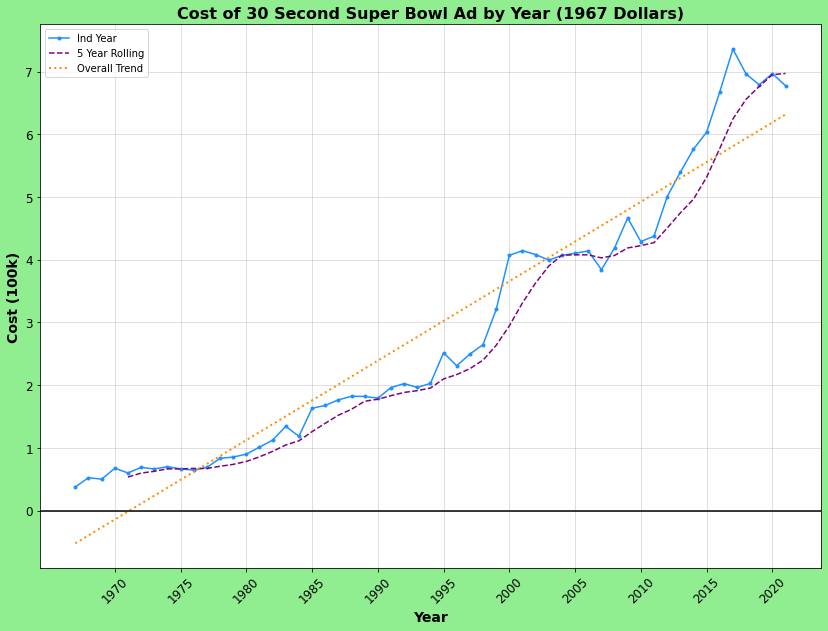


Overall Trend Line Equation: y = 0.126626x + (-0.522892)


In [357]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_facecolor('lightgreen')

plt.rcParams["figure.figsize"] = (14,10)
plt.plot(df.index, df.ad_cost_1967_dollars_100k, color='dodgerblue', linewidth=1.5, marker='.', label='Ind Year')

rolling_mean_5 = df.ad_cost_1967_dollars_100k.rolling(5).mean()
plt.plot(df.index, rolling_mean_5, color="Purple", linestyle='dashed', alpha=1, label="5 Year Rolling")

z = np.polyfit(df.index, df.ad_cost_1967_dollars_100k, 1)
p = np.poly1d(z)
plt.plot(df.index,p(df.index), linestyle='dotted',linewidth=2, color='darkorange', label='Overall Trend')

plt.axhline(0, color='black')

plt.title('Cost of 30 Second Super Bowl Ad by Year (1967 Dollars)', fontweight='bold', fontsize=16)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Cost (100k)', fontweight='bold', fontsize=14)

plt.xticks(df.index[(df["year"]==1970) | (df["year"] % 5 == 0)], df["year"][(df["year"]==1970) | (df["year"] % 5 == 0)], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='best')
plt.grid(alpha=0.5)
plt.show()
print()
print(color.BOLD +'Overall Trend Line Equation: ' + color.END + "y = %.6fx + (%.6f)"%(z[0],z[1]))

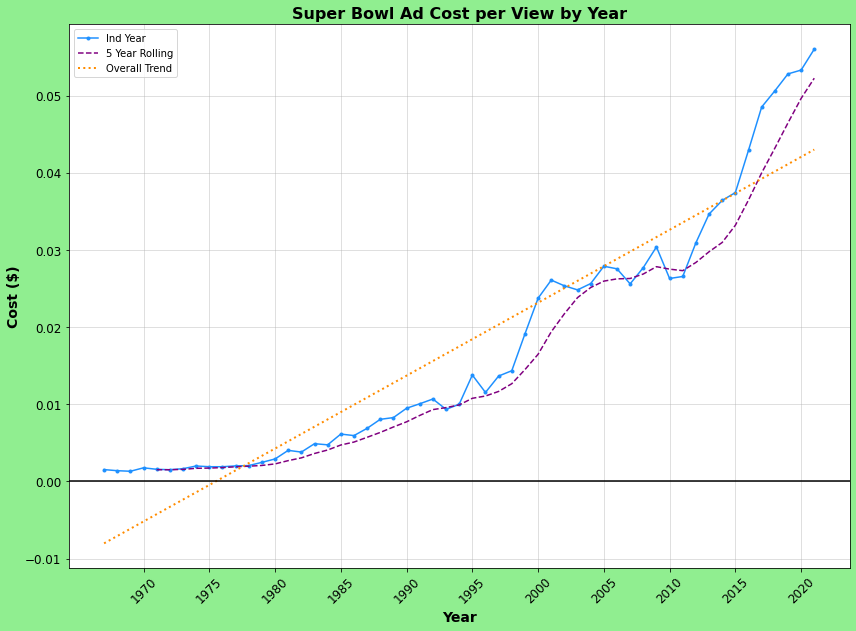


Overall Trend Line Equation: y = 0.000945x + (-0.008017)


In [358]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_facecolor('lightgreen')

plt.rcParams["figure.figsize"] = (14,10)
plt.plot(df.index, df.ad30sec_cost_view, color='dodgerblue', linewidth=1.5, marker='.', label='Ind Year')

rolling_mean_5 = df.ad30sec_cost_view.rolling(5).mean()
plt.plot(df.index, rolling_mean_5, color="Purple", linestyle='dashed', alpha=1, label="5 Year Rolling")

z = np.polyfit(df.index, df.ad30sec_cost_view, 1)
p = np.poly1d(z)
plt.plot(df.index,p(df.index), linestyle='dotted',linewidth=2, color='darkorange', label='Overall Trend')

plt.axhline(0, color='black')

plt.title('Super Bowl Ad Cost per View by Year', fontweight='bold', fontsize=16)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Cost ($)', fontweight='bold', fontsize=14)

plt.xticks(df.index[(df["year"]==1970) | (df["year"] % 5 == 0)], df["year"][(df["year"]==1970) | (df["year"] % 5 == 0)], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='best')
plt.grid(alpha=0.5)
plt.show()
print()
print(color.BOLD +'Overall Trend Line Equation: ' + color.END + "y = %.6fx + (%.6f)"%(z[0],z[1]))

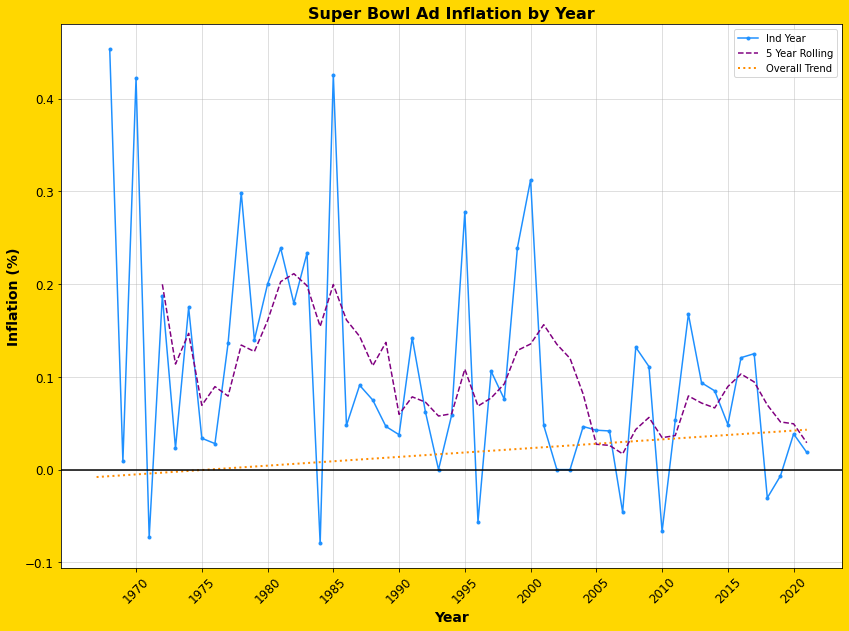


Overall Trend Line Equation: y = 0.000945x + (-0.008017)


In [365]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_facecolor('gold')

plt.rcParams["figure.figsize"] = (14,10)
plt.plot(df.index, df.ad_inflation, color='dodgerblue', linewidth=1.5, marker='.', label='Ind Year')

rolling_mean_5 = df.ad_inflation.rolling(5).mean()
plt.plot(df.index, rolling_mean_5, color="Purple", linestyle='dashed', alpha=1, label="5 Year Rolling")

z = np.polyfit(df.index, df.ad30sec_cost_view, 1)
p = np.poly1d(z)
plt.plot(df.index,p(df.index), linestyle='dotted',linewidth=2, color='darkorange', label='Overall Trend')

plt.axhline(0, color='black')

plt.title('Super Bowl Ad Inflation by Year', fontweight='bold', fontsize=16)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Inflation (%)', fontweight='bold', fontsize=14)

plt.xticks(df.index[(df["year"]==1970) | (df["year"] % 5 == 0)], df["year"][(df["year"]==1970) | (df["year"] % 5 == 0)], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='best')
plt.grid(alpha=0.5)
plt.show()
print()
print(color.BOLD +'Overall Trend Line Equation: ' + color.END + "y = %.6fx + (%.6f)"%(z[0],z[1]))

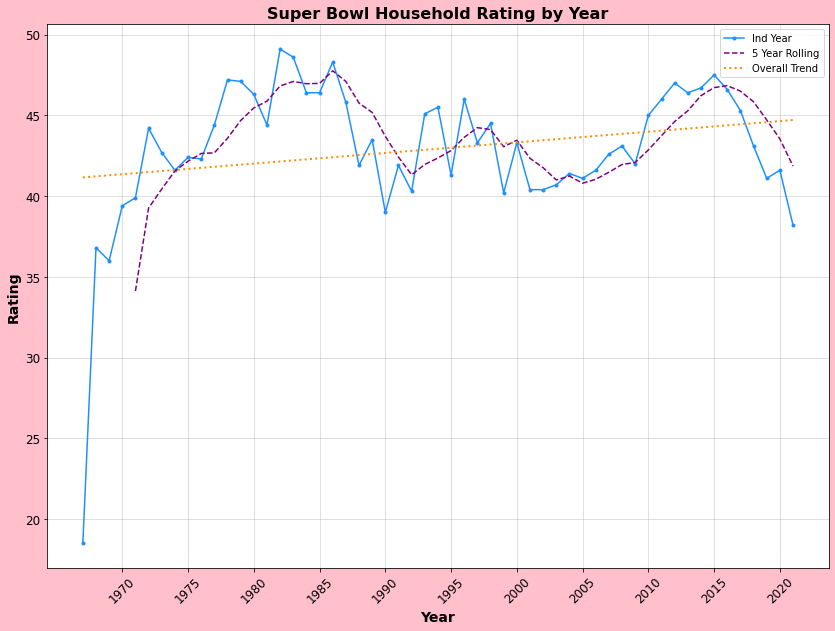


Overall Trend Line Equation: y = 0.065772x + (41.158701)


In [282]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_facecolor('pink')

plt.rcParams["figure.figsize"] = (14,10)
plt.plot(df.index, df.household_rating, color='dodgerblue', linewidth=1.5, marker='.', label='Ind Year')

rolling_mean_5 = df.household_rating.rolling(5).mean()
plt.plot(df.index, rolling_mean_5, color="Purple", linestyle='dashed', alpha=1, label="5 Year Rolling")

z = np.polyfit(df.index, df.household_rating, 1)
p = np.poly1d(z)
plt.plot(df.index,p(df.index), linestyle='dotted',linewidth=2, color='darkorange', label='Overall Trend')

plt.title('Super Bowl Household Rating by Year', fontweight='bold', fontsize=16)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Rating', fontweight='bold', fontsize=14)

plt.xticks(df.index[(df["year"]==1970) | (df["year"] % 5 == 0)], df["year"][(df["year"]==1970) | (df["year"] % 5 == 0)], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='best')
plt.grid(alpha=0.5)
plt.show()
print()
print(color.BOLD +'Overall Trend Line Equation: ' + color.END + "y = %.6fx + (%.6f)"%(z[0],z[1]))

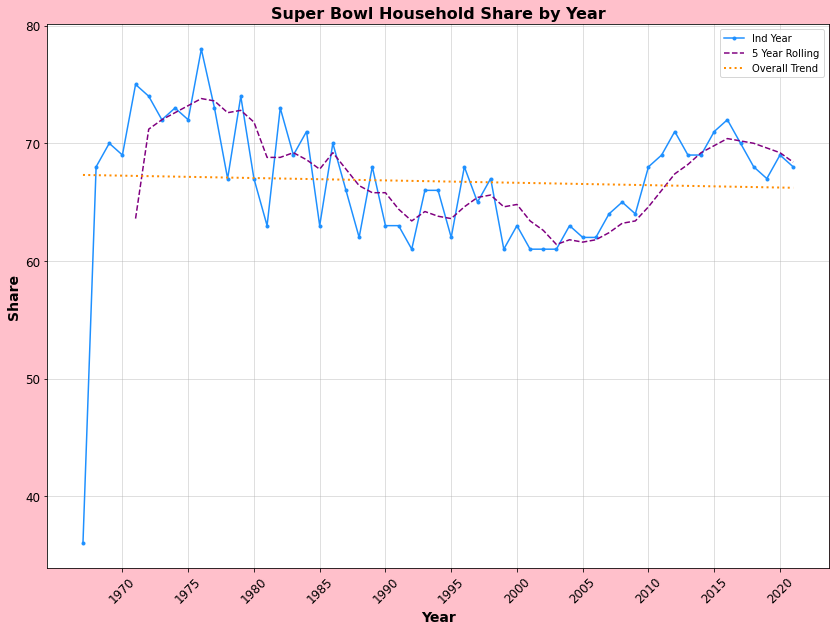


Overall Trend Line Equation: y = -0.020202x + (67.309091)


In [283]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_facecolor('pink')

plt.rcParams["figure.figsize"] = (14,10)
plt.plot(df.index, df.household_share, color='dodgerblue', linewidth=1.5, marker='.', label='Ind Year')

rolling_mean_5 = df.household_share.rolling(5).mean()
plt.plot(df.index, rolling_mean_5, color="Purple", linestyle='dashed', alpha=1, label="5 Year Rolling")

z = np.polyfit(df.index, df.household_share, 1)
p = np.poly1d(z)
plt.plot(df.index,p(df.index), linestyle='dotted',linewidth=2, color='darkorange', label='Overall Trend')

plt.title('Super Bowl Household Share by Year', fontweight='bold', fontsize=16)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Share', fontweight='bold', fontsize=14)

plt.xticks(df.index[(df["year"]==1970) | (df["year"] % 5 == 0)], df["year"][(df["year"]==1970) | (df["year"] % 5 == 0)], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='best')
plt.grid(alpha=0.5)
plt.show()
print()
print(color.BOLD +'Overall Trend Line Equation: ' + color.END + "y = %.6fx + (%.6f)"%(z[0],z[1]))

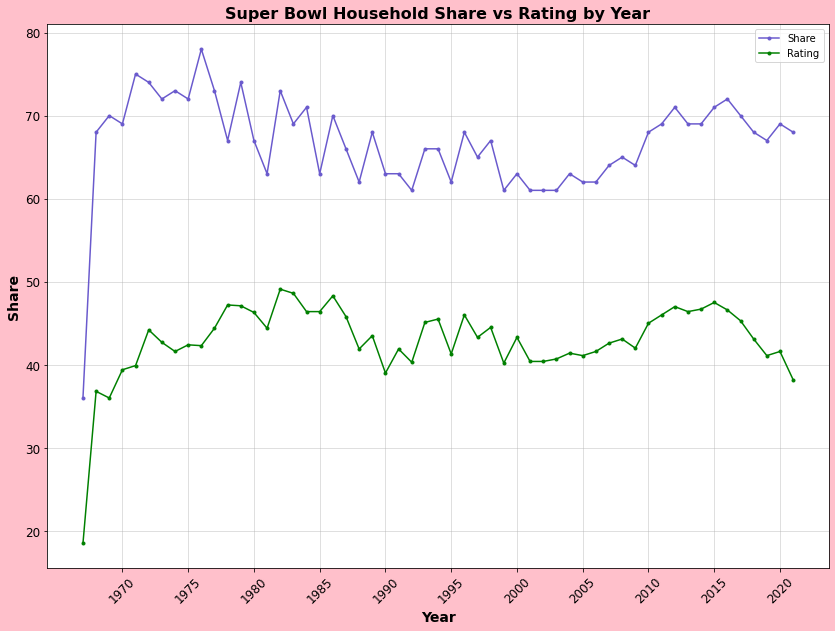

In [284]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_facecolor('pink')
plt.rcParams["figure.figsize"] = (14,10)

plt.plot(df.index, df.household_share, color='slateblue', linewidth=1.5, marker='.', label='Share')
plt.plot(df.index, df.household_rating, color='green', linewidth=1.5, marker='.', label='Rating')


plt.title('Super Bowl Household Share vs Rating by Year', fontweight='bold', fontsize=16)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Share', fontweight='bold', fontsize=14)

plt.xticks(df.index[(df["year"]==1970) | (df["year"] % 5 == 0)], df["year"][(df["year"]==1970) | (df["year"] % 5 == 0)], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='best')
plt.grid(alpha=0.5)
plt.show()